# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

---

<br />

# 1. QUE INFORMACION PUEDE SER UTIL PARA ABORDAR LA PROBLEMATICA?

<br />

---

**RESPUESTA:**
1. Cantidad de habitaciones
2. Superficie
3. Tipología de vivienda
4. Ubicacion
5. Calidad de Materiales
6. Amenities
7. Rural o urbana.
8. Estrato
9. Servicios
10. Antiguedad
11. Valor por Metro cuadrado.

Por que?
Toda la informacion es cuantificable y/o clasificable en valores monetarios. Todos influyen en el valor de la propiedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



---

<br />

# 2. ANALISIS EXPLORATORIO DE DATOS:

<br />

---

0. Importa las librerías necesarias para trabajar en la consigna.

In [88]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [90]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

Vamos a mostrar la cantidad de filas (Informacion disponible) y la cantidad de Columnas o Features del Dataset:

In [92]:
data.shape

(146660, 19)

Podemos entender cuando informacion estamos manejando y la cantidad de datos por Feature:

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [96]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [98]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [100]:
# Utilizando el dataset "data" y apuntando a la columna "property_type" utilizamos la funcion value_counts para tener la cuenta para cada columna.
data.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Podemos observar que existen 9 tipos de Propiedades y un rubro "Otros" ( En total con el ultimo serian 10 tipos)

Text(0.5, 1.0, 'Cantidad de Propiedades por Tipo')

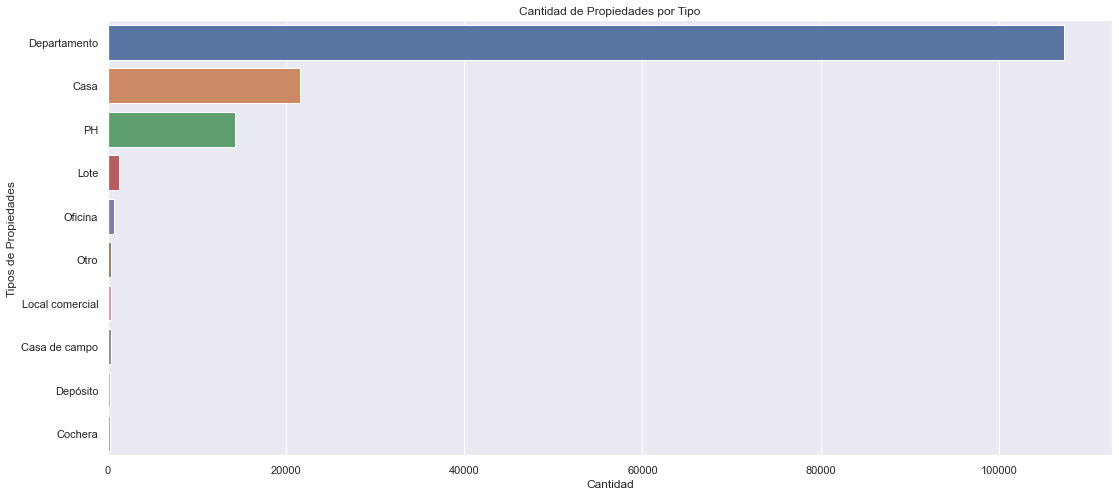

In [102]:
plt.figure(figsize=(18,8))
sns.countplot(data = data, order = data['property_type'].value_counts().index, y = "property_type")
plt.xlabel('Cantidad')
plt.ylabel('Tipos de Propiedades')

plt.title('Cantidad de Propiedades por Tipo')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [104]:
data.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [106]:
data.l3.value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

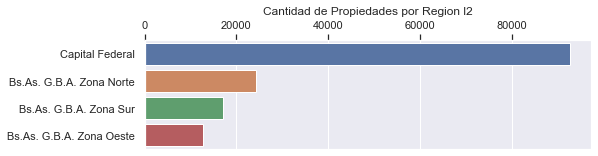

In [108]:
#ig, axes = plt.subplots(2, 1, figsize=(10, 10))#, sharex=True)
# l2
plt.figure(figsize=(8,2))
plt.title('Cantidad de Propiedades por Region l2')
ax = sns.countplot(data = data, y = "l2", order = data['l2'].value_counts().index)
plt.xlabel('')
plt.ylabel('')

ax.xaxis.tick_top()
#plt.ylabel('Tipos de Propiedades')
plt.show()


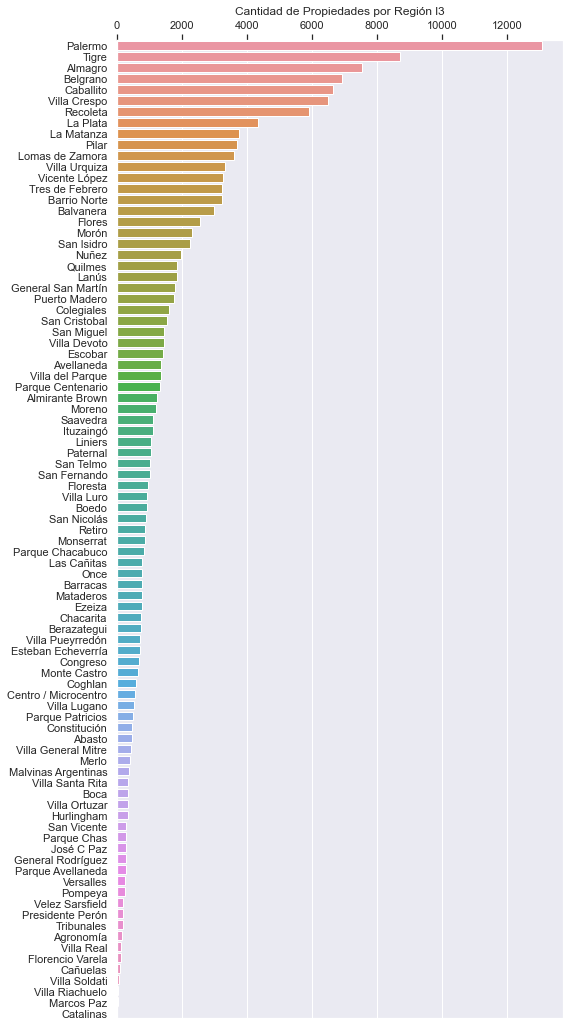

In [110]:
#l3:
plt.figure(figsize=(8,18))
plt.title('Cantidad de Propiedades por Región l3')
ax = sns.countplot(data = data, y = "l3", order = data['l3'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")#, fontsize=5)
plt.xlabel('')
plt.ylabel('')
#ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribucion de Propiedades por región'}, ylabel='l2'>

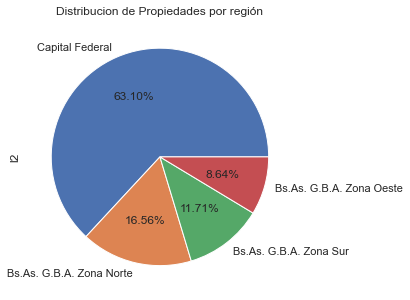

In [112]:
plt.title('Distribucion de Propiedades por región')
data.l2.value_counts().plot.pie(autopct='%1.2f%%', figsize=(5, 5))

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Dado el analisis efectuado hasta aqui, filtramos el data set por Capital Federal y las tipologias "Departamento" , "PH" y "Casa"

In [114]:
# Departamento, PH, Casa -> Capital Federal
new_data = data[data.l2 == 'Capital Federal'].copy()
new_data = new_data[(new_data.property_type == 'Departamento') | (new_data.property_type == 'PH') | (new_data.property_type == 'Casa')]
new_data.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Analizamos los datos Estadisticos de nuestro nuevo Data Set: 

In [116]:
#A:
new_data[['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Dispersion de la informacion de Superficie Total:

<AxesSubplot:title={'center':'Distribucion del Valor de Superficies Total:'}, xlabel='surface_total'>

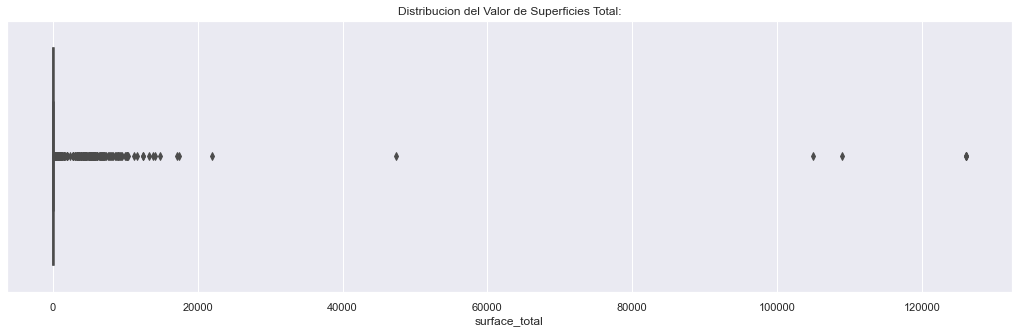

In [118]:
#B:
plt.figure(figsize=(18,5))
plt.title('Distribucion del Valor de Superficies Total:')
sns.boxplot(data = new_data, x = "surface_total")

Eliminamos "Outliers" de nuestros datos de SUperficie Total:

<AxesSubplot:title={'center':'Nueva Distribucion de superfice total con filtros aplicados'}, xlabel='surface_total'>

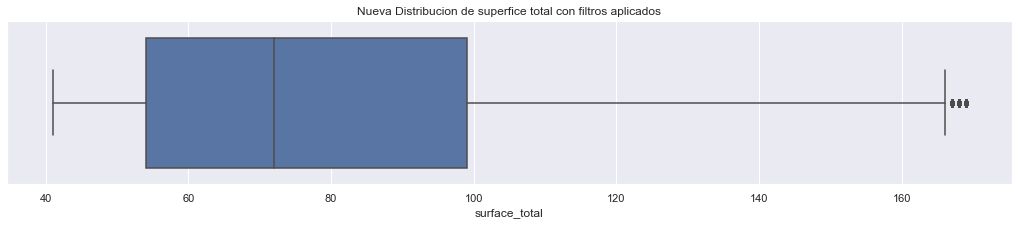

In [120]:
plt.figure(figsize=(18,3))
#B:
new_data = new_data[new_data.surface_total < 170]
#C:
new_data = new_data[new_data.surface_total > 40]
plt.title('Nueva Distribucion de superfice total con filtros aplicados')
sns.boxplot(data = new_data, x = "surface_total")

Removemos informacion "No coherente" de nuestros datos : Superficie cubierta no puede ser Mayo a sup. Total.

In [122]:
#D
new_data = new_data[new_data.surface_covered <= new_data.surface_total]

Analizamos y acotamos el rango de Precios:

<AxesSubplot:title={'center':'Nueva Distribucion de Precios total con filtros aplicados'}, xlabel='price'>

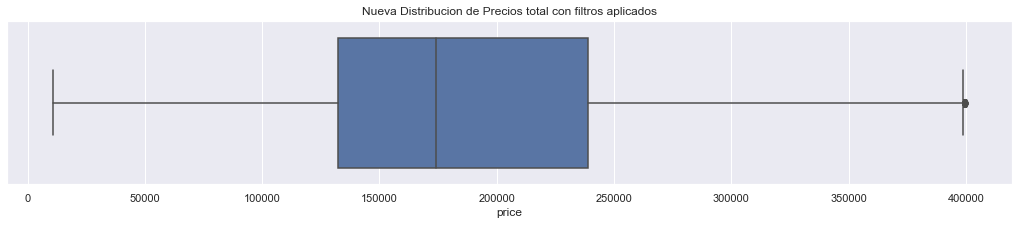

In [124]:
new_data = new_data[new_data.price < 400000]
plt.figure(figsize=(18,3))
plt.title('Nueva Distribucion de Precios total con filtros aplicados')
sns.boxplot(data = new_data, x = "price")

In [126]:
new_data.sort_values(by='price', ascending=False)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
88934,2019-02-11,2019-08-10,2019-02-11,-34.588902,-58.383256,Argentina,Capital Federal,Recoleta,3.0,2.0,2.0,104.0,95.0,399990.0,USD,VENTA DEPARTAMENTO 3 AMBIENTES RECOLETA,Corredor Responsable: GRACIELA Y. MENAZZI - CP...,Departamento,Venta
102315,2019-07-12,2019-07-15,2019-07-12,-34.624871,-58.424508,Argentina,Capital Federal,Boedo,4.0,3.0,3.0,150.0,128.0,399900.0,USD,José Mármol 900 Boedo PH 4amb c/coch U$399.900...,Apto crédito. Apto profesional. PH reciclado d...,PH,Venta
26264,2019-08-01,2019-08-14,2019-08-01,-34.624871,-58.424508,Argentina,Capital Federal,Boedo,4.0,3.0,3.0,150.0,128.0,399900.0,USD,José Mármol 900 Boedo PH 4amb c/coch U$399.900...,Apto crédito. Apto profesional. PH reciclado d...,PH,Venta
66514,2019-07-26,2019-09-14,2019-07-26,-34.621160,-58.463218,Argentina,Capital Federal,Flores,4.0,3.0,3.0,163.0,133.0,399350.0,USD,VENTA DEPARTAMENTO 4 AMB C DEP FLORES A EST PI...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento,Venta
18882,2019-11-10,9999-12-31,2019-11-10,-34.621087,-58.463211,Argentina,Capital Federal,Flores,4.0,3.0,2.0,163.0,133.0,399350.0,USD,Departamento Venta 4 ambientes de Categoría Fl...,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68377,2019-05-04,9999-12-31,2019-05-04,-34.665984,-58.444943,Argentina,Capital Federal,Villa Soldati,3.0,2.0,1.0,50.0,50.0,25000.0,USD,VENTA DEPARTAMENTO 3 AMBIENTES VILLA SOLDATI,Corredor Responsable: Raul Hector Merlo - CUCI...,Departamento,Venta
17274,2019-04-19,2019-06-08,2019-04-19,-34.553546,-58.469752,Argentina,Capital Federal,Coghlan,4.0,3.0,1.0,75.0,75.0,22500.0,USD,Luminoso dpto 4 amb/con espacio guarda coche,"Departamento de 4 ambientes, living comedor, t...",Departamento,Venta
106372,2019-09-12,2020-01-20,2019-09-12,-34.581966,-58.473492,Argentina,Capital Federal,Parque Chas,3.0,2.0,1.0,82.0,80.0,18900.0,USD,Venta Departamento en Parque Chas Capital Fede...,"Departamento en Venta, Departamento de 3 ambie...",Departamento,Venta
18672,2019-06-24,2019-07-10,2019-06-24,-34.576221,-58.448470,Argentina,Capital Federal,Colegiales,1.0,1.0,1.0,44.0,40.0,14000.0,USD,DEPARTAMENTO EN VENTA,Xintel (EDP-EDP-697) Alquiler de Departamento ...,Departamento,Venta


In [128]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57014 entries, 0 to 146550
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       57014 non-null  object 
 1   end_date         57014 non-null  object 
 2   created_on       57014 non-null  object 
 3   lat              54493 non-null  float64
 4   lon              54493 non-null  float64
 5   l1               57014 non-null  object 
 6   l2               57014 non-null  object 
 7   l3               57014 non-null  object 
 8   rooms            57014 non-null  float64
 9   bedrooms         57014 non-null  float64
 10  bathrooms        56482 non-null  float64
 11  surface_total    57014 non-null  float64
 12  surface_covered  57014 non-null  float64
 13  price            57014 non-null  float64
 14  currency         57014 non-null  object 
 15  title            57014 non-null  object 
 16  description      57014 non-null  object 
 17  property_ty

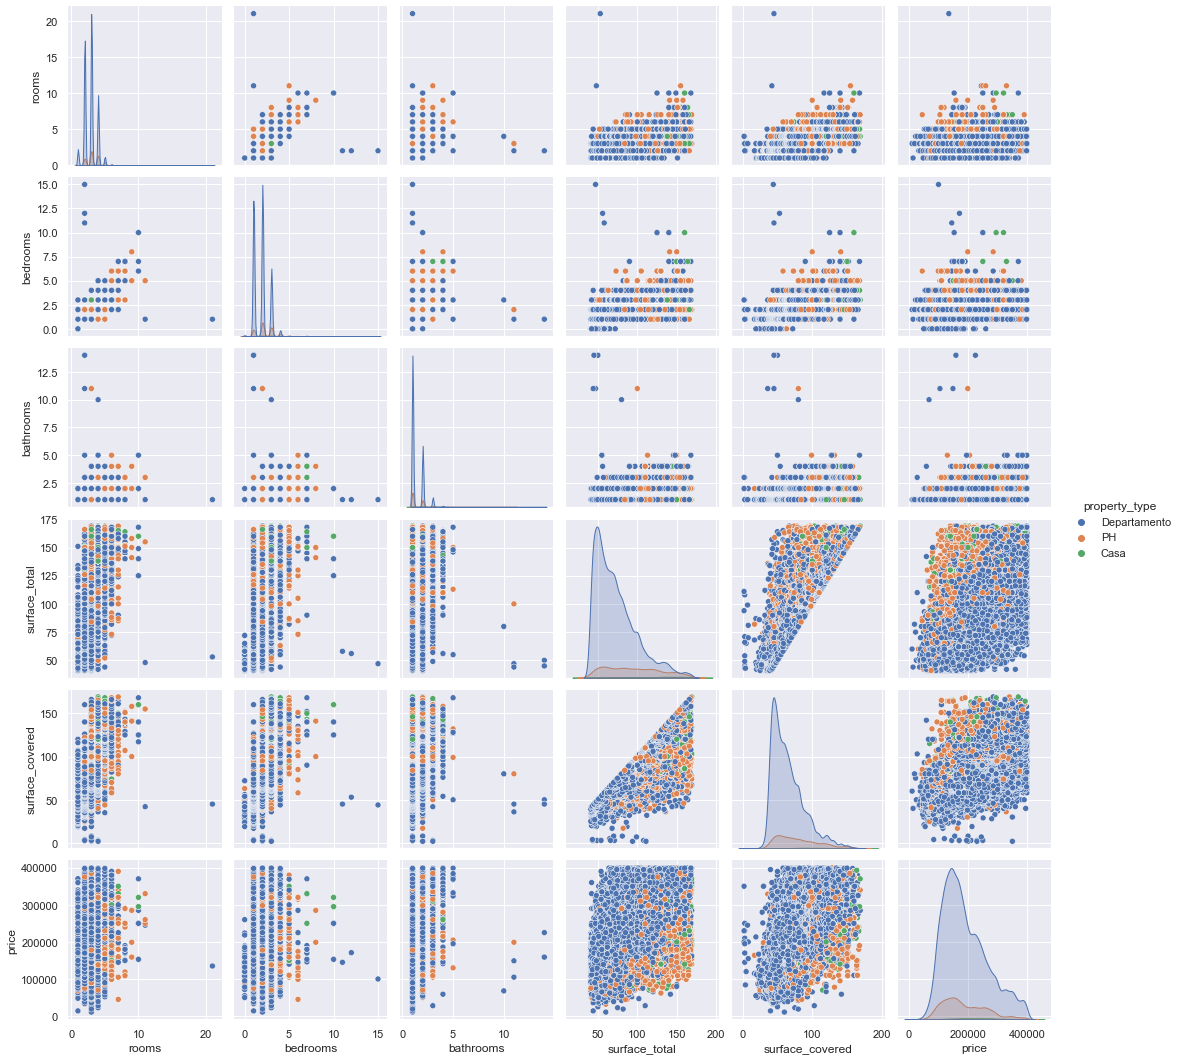

In [130]:
pair_data = new_data[['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered','price','property_type']]
sns.pairplot(pair_data, hue = 'property_type')

Analizamos un poco mas la distribucion de propiedades y regiones:

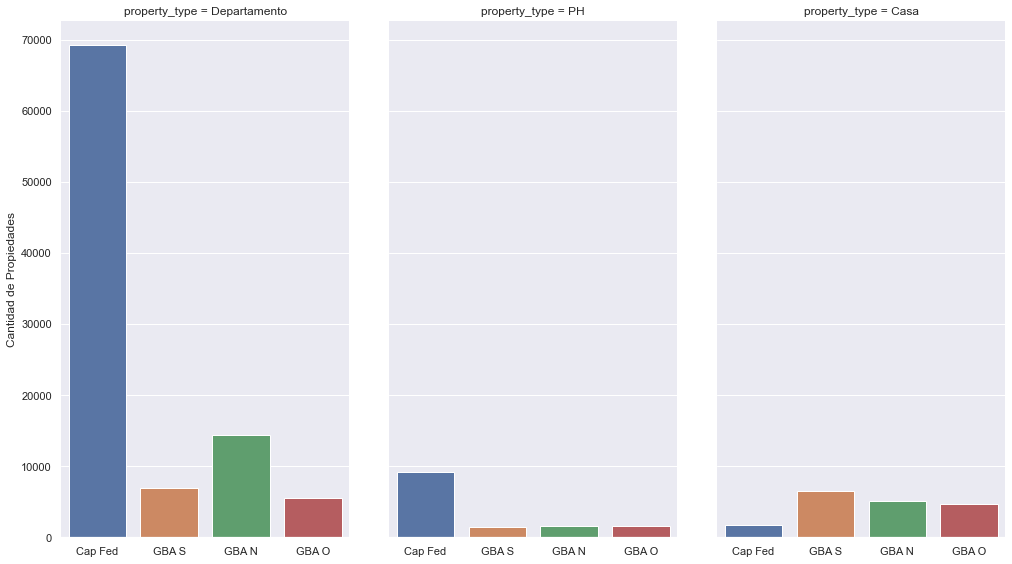

In [132]:
g = sns.catplot(data = data[((data.property_type == 'Departamento') | (data.property_type == 'PH') | (data.property_type == 'Casa')) & (data['price'] < 405000) ], 
            x = "l2", kind="count", height=8, aspect=.6, 
            col="property_type", col_wrap=3, legend=True)
g.set_axis_labels("", "Cantidad de Propiedades")
g.set_xticklabels(["Cap Fed", "GBA S", "GBA N","GBA O"])
#g.set_titles("{col_name} {col_var}")
#g.set(ylim=(0, 1))
g.despine(left=True)
plt.show()

Text(0.5, 1.0, 'Bs.As. G.B.A. Zona Oeste')

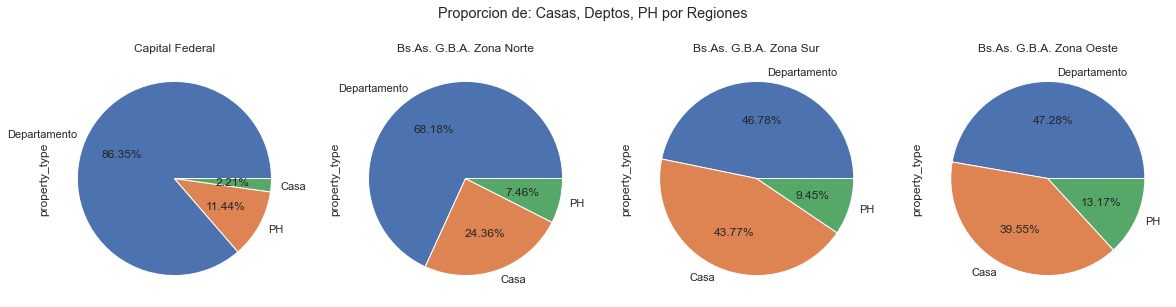

In [134]:

fig, axs = plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Proporcion de: Casas, Deptos, PH por Regiones')
data[(data.property_type.isin(['Casa','PH','Departamento'])) & (data['price'] < 405000) & (data['l2'] == 'Capital Federal')].property_type.value_counts().plot.pie(y='property_type',ax=axs[0],autopct='%1.2f%%')
axs[0].set_title('Capital Federal')
data[(data.property_type.isin(['Casa','PH','Departamento'])) & (data['price'] < 405000) & (data['l2'] == 'Bs.As. G.B.A. Zona Norte')].property_type.value_counts().plot.pie(y='property_type',ax=axs[1],autopct='%1.2f%%')
axs[1].set_title('Bs.As. G.B.A. Zona Norte')
data[(data.property_type.isin(['Casa','PH','Departamento'])) & (data['price'] < 405000) & (data['l2'] == 'Bs.As. G.B.A. Zona Sur')].property_type.value_counts().plot.pie(y='property_type',ax=axs[2],autopct='%1.2f%%')
axs[2].set_title('Bs.As. G.B.A. Zona Sur')
data[(data.property_type.isin(['Casa','PH','Departamento'])) & (data['price'] < 405000) & (data['l2'] == 'Bs.As. G.B.A. Zona Oeste')].property_type.value_counts().plot.pie(y='property_type', ax=axs[3],autopct='%1.2f%%')
axs[3].set_title('Bs.As. G.B.A. Zona Oeste')

De este ultimo analisis, decimos que las propiedades tipo Departamente, PH y Casa, son las predominantes en estas Zonas.
Podemos decir que Capital Federal tiene mucha mas concentracion de Departamento que el resto de las zonas ( GBA Norte, Sur y Oeste). Podemos suponer esto a la densidad de poblacion en Capital Federal.


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Estudiamos las correlaciones de nuestras variables: 

In [136]:
new_data.iloc[:, 8:14].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.939541,0.449371,0.694471,0.758202,0.478827
bedrooms,0.939541,1.000000,0.449615,0.686676,0.753940,0.469289
bathrooms,0.449371,0.449615,1.000000,0.526556,0.561177,0.541739
surface_total,0.694471,0.686676,0.526556,1.000000,0.899060,0.662444
surface_covered,0.758202,0.753940,0.561177,0.899060,1.000000,0.671566
price,0.478827,0.469289,0.541739,0.662444,0.671566,1.000000


In [138]:
#new_data[new_data.property_type == 'Departamento'].corr()
new_data[new_data.property_type == 'Departamento'].iloc[:, 8:14].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.937558,0.453501,0.691027,0.757268,0.485344
bedrooms,0.937558,1.000000,0.454256,0.687182,0.752309,0.472440
bathrooms,0.453501,0.454256,1.000000,0.567663,0.582806,0.553079
surface_total,0.691027,0.687182,0.567663,1.000000,0.914900,0.711964
surface_covered,0.757268,0.752309,0.582806,0.914900,1.000000,0.696447
price,0.485344,0.472440,0.553079,0.711964,0.696447,1.000000


In [140]:
new_data[new_data.property_type == 'PH'].iloc[:, 8:14].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.936999,0.459667,0.633646,0.717674,0.527786
bedrooms,0.936999,1.000000,0.453697,0.619091,0.722003,0.531220
bathrooms,0.459667,0.453697,1.000000,0.443242,0.534014,0.479724
surface_total,0.633646,0.619091,0.443242,1.000000,0.815389,0.628397
surface_covered,0.717674,0.722003,0.534014,0.815389,1.000000,0.691326
price,0.527786,0.531220,0.479724,0.628397,0.691326,1.000000


In [142]:
new_data[new_data.property_type == 'Casa'].iloc[:, 8:14].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.916388,0.313592,0.517490,0.534439,0.270682
bedrooms,0.916388,1.000000,0.334493,0.471702,0.518400,0.296831
bathrooms,0.313592,0.334493,1.000000,0.166834,0.283659,0.298514
surface_total,0.517490,0.471702,0.166834,1.000000,0.742665,0.375495
surface_covered,0.534439,0.518400,0.283659,0.742665,1.000000,0.434650
price,0.270682,0.296831,0.298514,0.375495,0.434650,1.000000


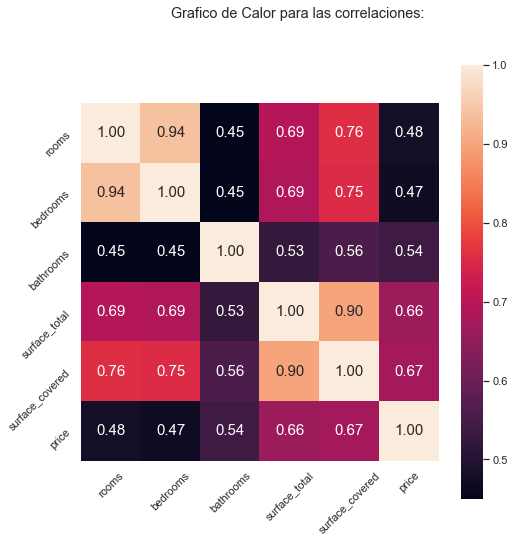

In [144]:
corr = new_data.iloc[:, 8:14].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.iloc[:, 8:14].columns, 
           yticklabels= data.iloc[:, 8:14].columns)
          # cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.suptitle('Grafico de Calor para las correlaciones:')
plt.show()

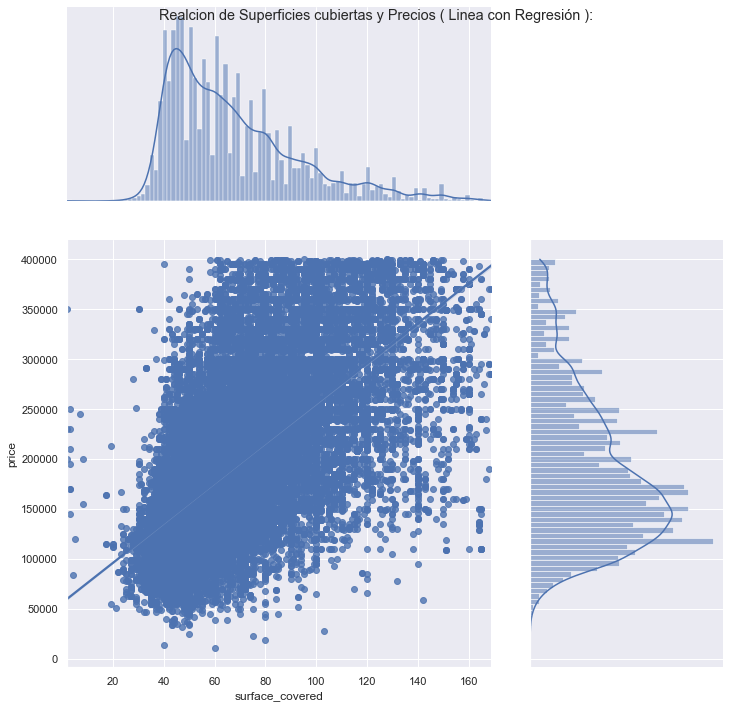

In [146]:
sns.jointplot(x="surface_covered", y="price",height=10, ratio=2, data=new_data, kind='reg')#, marginal_kws=dict(bins=15, rug=True)
plt.suptitle('Realcion de Superficies cubiertas y Precios ( Linea con Regresión ):')
plt.show()

### Analisis: 
#### Se puede observar que el Precio vs Superficie total/cubierta, deja de tener una correlacion fuerte con los PH y las Casas. Con el departamento es un poco mas fuerte la correlacioón.
#### Tambien se puede ver que para el caso de las Casas , la correlacion de las habitaciones vs el Precio es menor que en los departamentos o PH debido , seguramente, a la posibilidad de tener patio o superficie para otro uso.

#### Nuestro ultimo Grafico muestra una relacion "positiva" o de especia "lineal" entre los datos de SUperficie y el dato del Precio. Esta será nuestra Hipotesis


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Para poder analizar mejor la informacion seria apropiado tener el valor del m2

Revisamos la distribucion de los precios para entender:

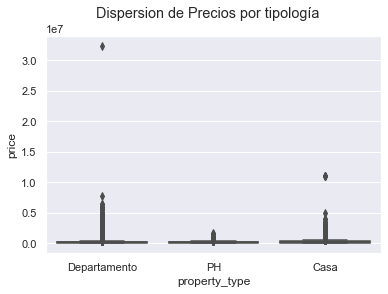

In [148]:
sns.boxplot(data = data[data.property_type.isin(['Casa','PH','Departamento'])], x = 'property_type', y = "price")
plt.suptitle('Dispersion de Precios por tipología')
plt.show()

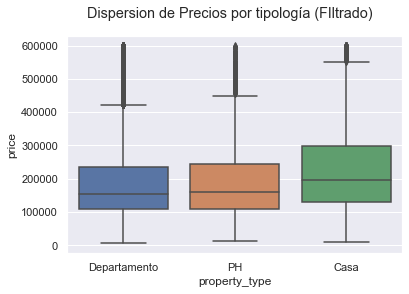

In [150]:
sns.boxplot(data = data[(data['price'] < 600000) & (data.property_type.isin(['Casa','PH','Departamento']))], x = 'property_type', y = "price")
plt.suptitle('Dispersion de Precios por tipología (FIltrado)')
plt.show()

Calculamos la mediana para tener una estimacion de la distribucion de precios por Barrios de Capital FEderal:

In [152]:
# EL top de barrios mas caros de Capital Federal es:
new_data.filter(items=['l3', 'price']).groupby('l3').median().sort_values(by='price',ascending=False).head()

,price
l3,
Puerto Madero,325000.0
Recoleta,250000.0
Barrio Norte,230000.0
Belgrano,229000.0
Las Cañitas,229000.0


Que tipologia de propiedad es la mas cara? 

In [153]:
# Propiedad con mayor Mediana de precio en Capital Federal
new_data.filter(items=['property_type', 'price']).groupby('property_type').median().sort_values(by='price',ascending=False)

,price
property_type,
Casa,229000.0
Departamento,174000.0
PH,170000.0


Graficamos la distribucion de precios de las propiedades vs las Regiones:

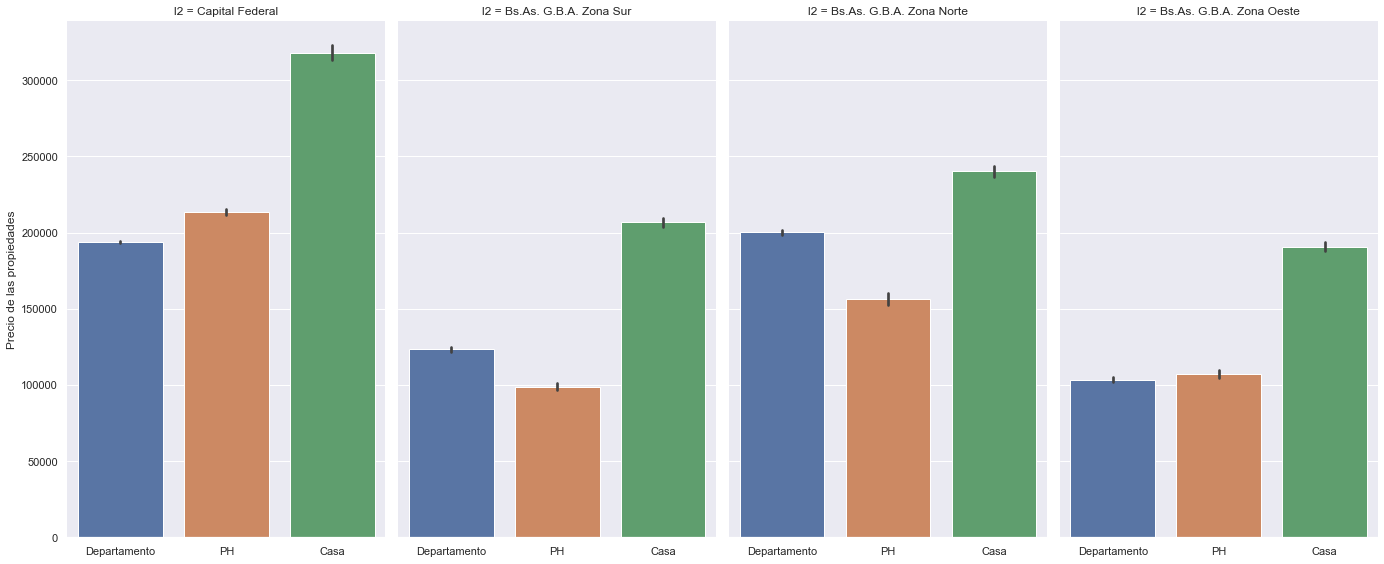

In [154]:
#De nuestro analisis anterior sabemos que debemos eliminar los outliers:
g = sns.catplot(data = data[(data['price'] < 600000) & (data.property_type.isin(['Casa','PH','Departamento'])) ],
#g = sns.catplot(data = data[data.property_type.isin(['Casa','PH','Departamento'])],
            x = "property_type", y = 'price', kind="bar", height=8, aspect=.6, 
            col="l2", col_wrap=4, legend=True)
g.set_axis_labels("", "Precio de las propiedades")
g.despine(left=True)

plt.show()

---

<br />

# 3. Modelo de Machine Learning

<br />

---

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [155]:
ml_data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') # Cargamos el Data set desde al archivo original
#Filtramos por Region y por tipologia:
ml_data = ml_data[(ml_data['l2'] == 'Capital Federal') & (ml_data.property_type.isin(['Casa','PH','Departamento'])) ] 
#Filtramos Outliers:
ml_data = ml_data[(ml_data['surface_total'] <= 1000) & (ml_data['surface_total'] >= 15) ]
#Filtramos Precios
ml_data = ml_data[(ml_data['price'] <= 4000000)]
#Filtramos los datos que vamos a utilizar (los numericos)
ml_data = ml_data.iloc[:, 8:14]
#Filtramos los datos nulos o faltantes
ml_data = ml_data.dropna(axis = 0)

In [156]:
ml_data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


In [157]:
ml_data.shape

(81019, 6)

In [158]:
#Importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Para seleccionar nuestra Metrica, hemos observado y analizado (EDA) nuestros datos y, tambien, entendimos como estan compuestos, distribuidos, etc.
### Para nuestro analisis vamos a observar 

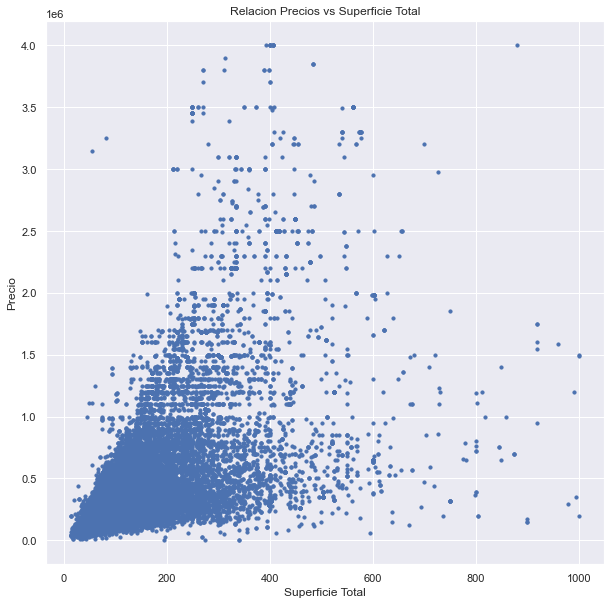

In [159]:
plt.figure(figsize=(10,10))
plt.scatter(ml_data.surface_total,ml_data.price, s = 10)
plt.xlabel('Superficie Total')
plt.ylabel('Precio')
plt.title('Relacion Precios vs Superficie Total')
plt.show()

### Dentro de todas las metricas existentes y analizando nuestro valores vamos a utilizar la metrica -> `RMSE Root Mean Squared Error`. 
### Utilizamos esta metrica para poder tener una medicion que conserve las unidades del "Target" y, tambien, debido a los altos valores de la misma. (con el formato de esta metrica de medicion de cuadrados, no nos impacta tanto grandes valores de error). Tambien, en este caso donde comparamos modelos y no comparamos datos, esta metrica se ajusta correctamente ya que no tendriamos diferentes escalas a comparar. 

### Que podemos esperar de los valores? -> Como los valores de del target son elevados, seguramente tendremos valores de RMSE del mismo orden de magnitud, pero nos servira para comparar los modelos. Se deberá lograr que el valor de RMSE sea lo mas bajo posible ya que la misma mide "el grado de error" entre la variable predicha y la variable a predecir.

#### Nuestra variable "target" sera `Precios` -> "y" a partir de ahora
#### y las variables "feature" seran `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`
#### Proponemos un modelo de Benchmark linealizando los vectores de Precios y Superficie Total

Revisamos y entendemos la dispersion de datos en la variable Superficie Total para entender la distribucion de nuestros Features:

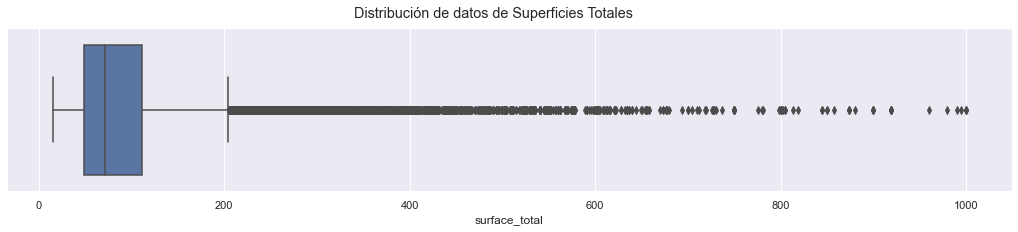

In [160]:
#ml_data = ml_data[ml_data.surface_total < 400]
plt.figure(figsize=(18,3))
sns.boxplot(data = ml_data, x = "surface_total")
plt.suptitle('Distribución de datos de Superficies Totales')
plt.show()

In [161]:
#X = ml_data.iloc[:, 0:5]
#X = ml_data.iloc[:, 3:5]
X = ml_data['surface_total']
X = X.to_numpy()
X = X.reshape(-1,1)
y = ml_data['price']

Para nuestro modelo Benchmark lo que hacemos es "linearizar" el target "Precio" , combirtiendolo en un vector igualmente distribuido.

In [162]:
y_aprox = np.linspace(y.min(), y.max(), len(y))
x_aprox = np.linspace(ml_data.surface_total.min(), ml_data.surface_total.max(), len(ml_data.surface_total))

Graficamos la relacion entre nuestro Modelo Benchmark y los datos Reales:

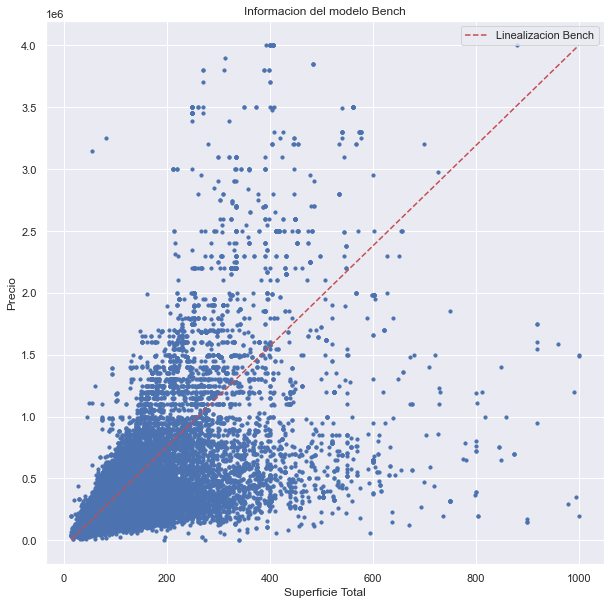

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(ml_data.surface_total,y, s = 10)
plt.plot(x_aprox, y_aprox, '--',label ='Linealizacion Bench', c = 'r')
plt.xlabel('Superficie Total')
plt.ylabel('Precio')
plt.title('Informacion del modelo Bench')
plt.legend()
plt.show()

Medimos el resultado de nuestro Benchmark respecto a los resultados reales:

In [164]:
from sklearn.metrics import mean_squared_error
print(f'Modelo Benchmark creado:')
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y, y_aprox))}')

Modelo Benchmark creado:
Raíz del error cuadrático medio: 2100178.0577261876


#### Vemos que para nuestro modelo Benchmark , el RMSE da un valor muy elevado.

#### Filtramos los datos para Entrenar y definir nuestros Modelos de ML para el trabajo:

In [165]:
X = ml_data.iloc[:, 0:5]
y = ml_data['price']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Vamos a probar el modelo de KNN para revisar su comportamiento con distintos Hyperparámetros:

In [167]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_msle_train = []
lista_msle_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_msle_train.append(train_acc)
    lista_msle_test.append(test_acc)

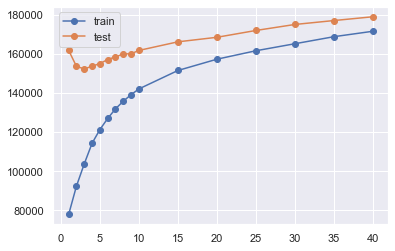

In [168]:
plt.plot(k_vecinos,lista_msle_train,'o-',label='train' )
plt.plot(k_vecinos,lista_msle_test,'o-',label='test')
plt.legend()

#### Vamos a probar el modelo de Arboles de Decisión para revisar su comportamiento con distintos Hyperparámetros:

In [169]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_msle_train = []
lista_msle_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_msle_train.append(train_acc)
    lista_msle_test.append(test_acc)

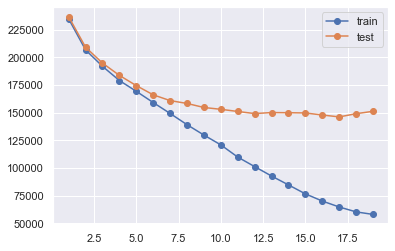

In [170]:
plt.plot(max_depths,lista_msle_train,'o-',label='train' )
plt.plot(max_depths,lista_msle_test,'o-',label='test')
plt.legend()

### De lo graficos y resultados anteriores, podemos elegir Valores de Hiperparametros donde el error es bajo y los valores de los datos reales contra los predichos no tienen mucha dispersion (evitamos el overfitting)

In [171]:
knn_regressor = KNeighborsRegressor(n_neighbors=8)#(n_neighbors=4)
tree_regressor = DecisionTreeRegressor(max_depth=10)#(max_depth=12)
knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153190.0660696124


C:\Users\Ignacio\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ignacio\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


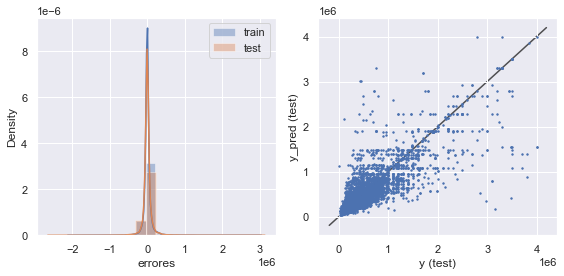

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 135799.4510120079
Raíz del error cuadrático medio en Test: 159931.45447015658


C:\Users\Ignacio\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ignacio\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


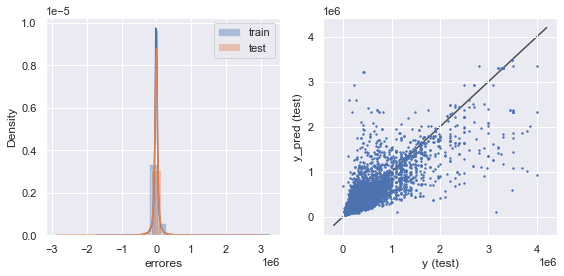

In [172]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

#### Conclusion del análisis: 
#### Es notoria la diferencia de la performance entre el modelo Benchmark creado y los entrenados de KNN y Arbol de decisión, claramente estos 2 ultimos mejoran el valor de RMSE con los hyperparametros seleccionados.
#### Que modelo es el mejor a utilizar? -> De nuestro analisis ambos modelos performan de manera similar de acuerdo a la medicion del error, es por eso que a simple vista es complicado, pero si tenemos que elegir uno seria, en este caso , KNN ya que el error en los datos de "train" y "test" es mas parecido. 

#### Que podriamos mejorar de la metodologia?
#### En mi opinion, podriamos mejorar la busqueda de los hyperprarametros mediante un K-fold cross validation. (en nuestro procedimiento lo hicimos un poco a mano).
#### Tambien podriamos mejorar los datos, por ejemplo, filtramos los datos faltantes o nulos pero se podria generar datos para no perder toda la instancio. Por otro lado , tambien, se podria "numerizar" los datos categoricos , por ejemplo, los barrios, para dar mas informacion al modelo.

Vamos  a probar nuestro modelo con un valor al azar:

In [173]:
#prop_pred = pd.DataFrame({'0': [4,2,3,350,170]}, index=['rooms', 'bedrooms', 'bathrooms','surface_total','surface_covered'])
prop_pred = pd.DataFrame({'rooms': [4], 'bedrooms': [2], 'bathrooms': [2],'surface_total': [350],'surface_covered': [120]})
prop_pred

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,4,2,2,350,120


In [174]:
precio_pred = knn_regressor.predict(prop_pred)
print ('El precio para una propiedad de 4 Habitaciones, 2 Dormitorios, 2 Baños, Sup Total 350 mts2 y sup cubierta de 120 mts2 es: {0:.0f} USD'
       .format(float(precio_pred)))

El precio para una propiedad de 4 Habitaciones, 2 Dormitorios, 2 Baños, Sup Total 350 mts2 y sup cubierta de 120 mts2 es: 420000 USD


In [175]:
precio_pred2 = tree_regressor.predict(prop_pred)
print ('El precio para una propiedad de 4 Habitaciones, 2 Dormitorios, 2 Baños, Sup Total 350 mts2 y sup cubierta de 120 mts2 es: {0:.0f} USD'
       .format(float(precio_pred2)))

El precio para una propiedad de 4 Habitaciones, 2 Dormitorios, 2 Baños, Sup Total 350 mts2 y sup cubierta de 120 mts2 es: 350867 USD


In [179]:
filtro = ml_data[(ml_data['rooms'] == 4) & (ml_data['bedrooms'] == 2) 
                  & (ml_data['bathrooms'] == 3) & ((ml_data['surface_covered'] > 110) & (ml_data['surface_covered'] < 130))] 
print ('Precio medio para la configuracion probada en un rango de superficies cubuertas entre 110 y 130 mts2: {0:.0f} USD'
       .format(float(filtro.price.mean())))

Precio medio para la configuracion probada en un rango de superficies cubuertas entre 110 y 130 mts2: 400655 USD


#### De la comparacion podemos ver que el valor predicho por el modelo tiene un error dentro del rango predicho por la metrica.
#### Comparando, tambien , el test en ambos modelos , vemos que KNN responde mas cercano y arboles de decision con un error mayor ( de todas formas dentro de un rango aceptable).

### ===============================================================================================================

#### Como complemento a nuestro analisis ( esto no es solicitado en el mismo pero me parece oportuno colocarlo ya que es parte de la investigacion de las metricas):
#### Revisando otras metricas a las anteriormente utilizadas, vemos que el comportamiento de ambos modelos (KNN y Abroles de decision) , para los hiperparametros seleccionados, es muy parecido y ampliamente mejor al Benchmark.
#### Para las metricas que contamplan grandes dispersión de datos ("porcentuales") vemos que tambien, la respuesta de los modelos es buena.
#### Nota: el coeficiente de determinacion R2 nos da la medida en que el modelo esta "Bien" entrenado y como va a responder a valores nunca visto

In [177]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, r2_score
print(f'Modelo Benchmark creado:')
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y, y_aprox))}')
print(f'Error Absoluto porcentual Medio : {mean_absolute_percentage_error(y, y_aprox)}')
print(f'R2, Coeficiente de determinacion: {r2_score(y, y_aprox)}') 

Modelo Benchmark creado:
Raíz del error cuadrático medio: 2100178.0577261876
Error Absoluto porcentual Medio : 11.142250903896127
R2, Coeficiente de determinacion: -48.35383387056995


In [178]:
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    print(f'Modelo Benchmark: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mae_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Error Absoluto porcentual Medio en Train: {mae_train}')
    print(f'Error Absoluto porcentual Medio en Test: {mae_test}')
    print(f'R2, Coeficiente de determinacion en Train: {r2_train}')
    print(f'R2, Coeficiente de determinacion en Test: {r2_test}')  
    print('\n')

Modelo Benchmark: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153190.0660696124
Error Absoluto porcentual Medio en Train: 0.24490545836782293
Error Absoluto porcentual Medio en Test: 0.25948997319983336
R2, Coeficiente de determinacion en Train: 0.8351328504335362
R2, Coeficiente de determinacion en Test: 0.7431947197835425


Modelo Benchmark: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 135799.4510120079
Raíz del error cuadrático medio en Test: 159931.45447015658
Error Absoluto porcentual Medio en Train: 0.22741736741327817
Error Absoluto porcentual Medio en Test: 0.24737899681660414
R2, Coeficiente de determinacion en Train: 0.7916400429741483
R2, Coeficiente de determinacion en Test: 0.7200950905674577


